Purpose
It costs a lot of money and takes a lot of time to apply for a master's degree. With the help of this module, students can estimate their abilities and choose whether or not to apply for a master's degree.


This data set essentially asks, given a set of standardised scores like the GRE, TOEFL, SOP standard scores, and LOR standard scores

#Dataset

This dataset is created for prediction of graduate admissions.

*Features in the dataset:

serial no =  serves as an individual identification number for each student.

GRE Scores = The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.

TOEFL = Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing

University Rating = The rating of the university the student completed his undergraduate degree from.

Statement of Purpose (SOP)= Statement of Purpose (SOP) is a letter written by the student himself to state his purpose and motivation for completing a graduate degree in addition to his goals while and after he completes his study. Many universities find this letter significant because it better describe the student from a personal perspective.

Letter of Recommendation (LOR) = Letter of Recommendation (LOR) is a letter written by a person that knows the student and recommends that the university accept his admission, this person can be a professor in his undergraduate degree or a professional whom the student have worked with.

CGPA = Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

Research Experience ( either 0 or 1 ) 0 refer to no exp and 1 means having exp.

Chance of Admit ( ranging from 0 to 1 ) 0 refer to no adimssion and 1 means having chance of admission. 

1. importing the libs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

2. Reading and loading the dataset

In [ ]:
df= pd.read_csv("/content/Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


3. EDA

In [ ]:
df.head() # 10 data observations, Since the columns are spaced apart, the underscroll will be filled.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

Insights:

This dataset has 9 features and 500 attributes.

 Dataset contains 9 features out of which 1 is independant and 8 is dependant.

In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Insights:

Serial_No.             
GRE_Score              
TOEFL_Score      
University_Rating
Research 
above columns are int

Below columns are flaots
SOP                  
CGPA 
Chance_of_Admit

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


insights:

maximum gre score is 340 and minimum is 290.

maximum toeflscore is 120 and minimum is 92.

majority of university rating, lor and sop is 5 and minimum is 1.

maximum cgpa is 9.9 and minimum is 6.8

reserch is binary 1 , 0 

chance of admission maximum is 0.97 and mini 3.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Insights:

Dataset has zero missing data.

In [ ]:
# Renaming the columns
df.rename({"Chance of Admit ": "Chance_of_Admit", "University Rating": "University_Rating", "GRE Score": "GRE_Score","TOEFL Score":"TOEFL_Score"}, axis=1,inplace=True)


In [ ]:
df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

3. Data Visualiazation & Data Cleaning

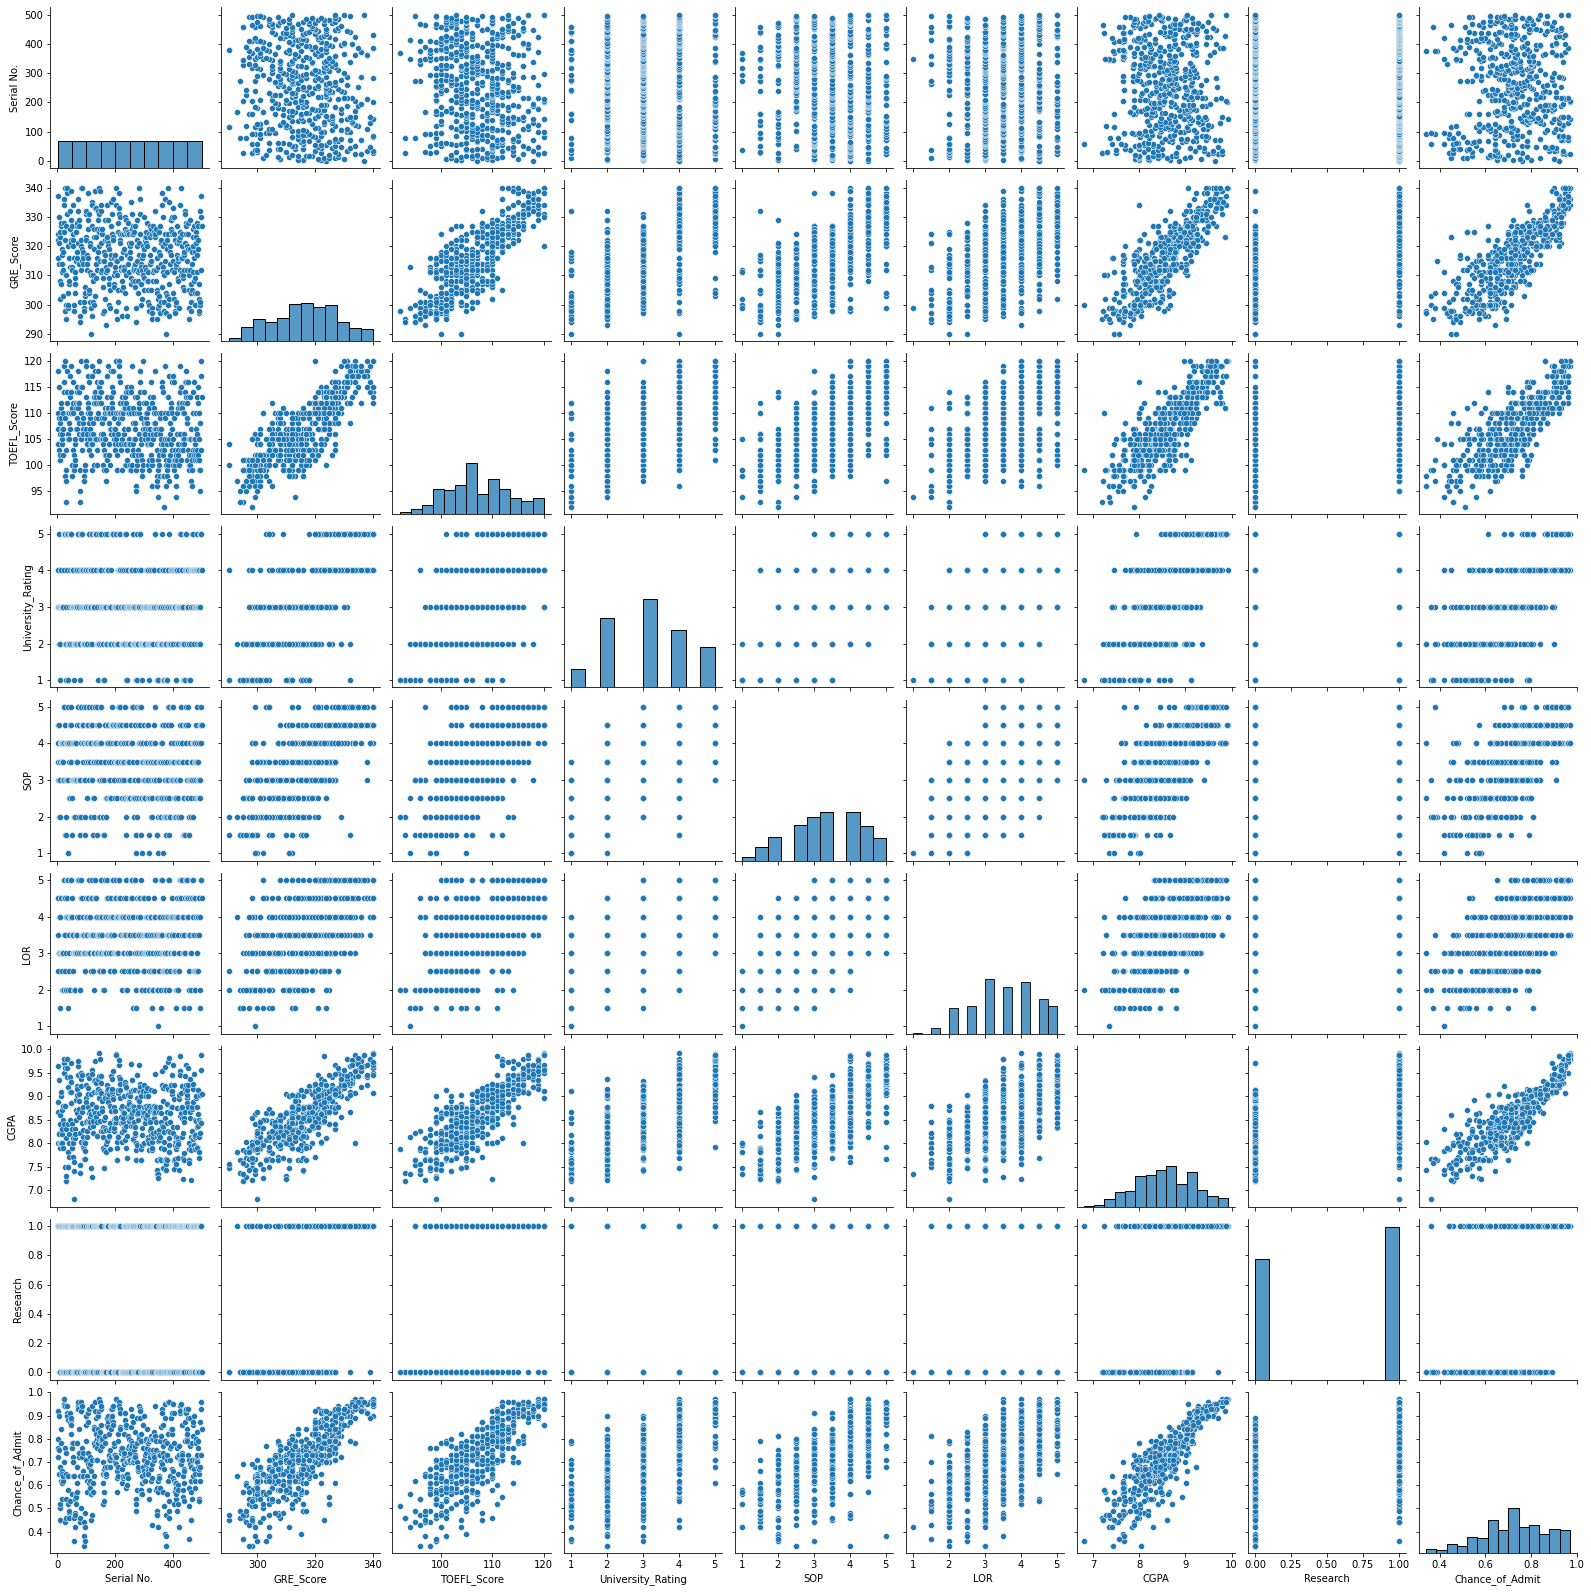

In [ ]:
figsize=(20,20)
sn.pairplot(df, kind="scatter")
plt.show()

Insights:

cgpa and gre_score , TOEFL_Score and chance of admission are positiveely correlated.

Research column has binary distribution 0 & 1

CGPA column is slightly left skewed.

GRE_Score cloumn is normally distributed.



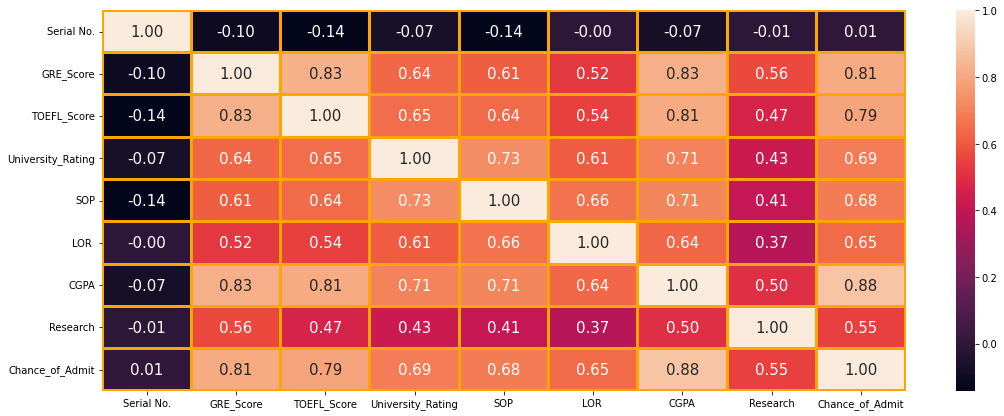

In [ ]:
plt.figure(figsize = (18, 7))
sn.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

Insights:

chance_of_admit is corelerated with all the features accept serial_no hence i will drop the serial_no column



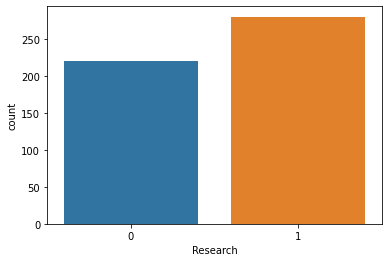

In [ ]:
sn.countplot(x="Research",data=df)

insights:

Majority of students Have experience thats why the count of 1 is more than 0

In [ ]:
df=df.drop('Serial No.', axis=1)

In [ ]:
percentage= (df['University_Rating'] / df['University_Rating'].sum()) * 100 # percentage of university
percentage.value_counts()


0.192678    162
0.128452    126
0.256904    105
0.321130     73
0.064226     34
Name: University_Rating, dtype: int64

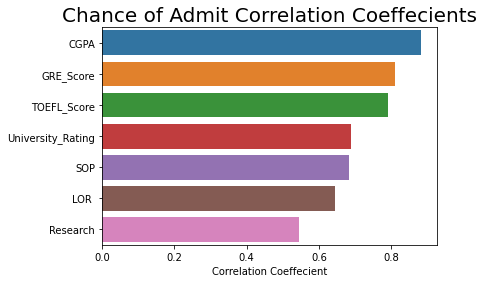

In [ ]:
COA_corr = pd.DataFrame(df.corr()['Chance_of_Admit'])
COA_corr.rename({'Chance_of_Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance_of_Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sn.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

insights:

It is obvious that CGPA, GRE, and TOEFL scores have the greatest impact on the likelihood of admission.

Deciding x and y


In [ ]:
x=df.drop("Chance_of_Admit", axis=1)

In [ ]:
y=df["Chance_of_Admit"]

In [ ]:
#Standardization action to ensure that data are scaled uniformly
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['CGPA','GRE_Score', 'TOEFL_Score']] = scaler.fit_transform(x[['CGPA','GRE_Score', 'TOEFL_Score']])

Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

## Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [ ]:
logmodel = LinearRegression()

In [ ]:
logmodel.fit(x_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [ ]:
logmodel.coef_

array([ 0.01877241,  0.02195914,  0.00614723, -0.0006873 ,  0.01799385,
        0.07137559,  0.01557291])

## Predicting Test Data

In [ ]:
predictions=logmodel.predict(x_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

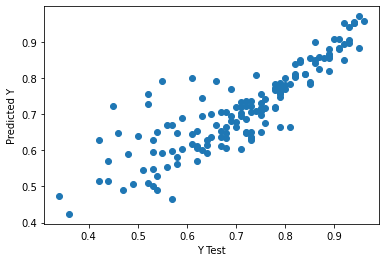

In [ ]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
import sklearn.metrics as metrics 
print("MAE:{}".format(metrics.mean_absolute_error(y_test,predictions)))
print("MSE:{}".format(metrics.mean_squared_error(y_test,predictions)))
print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

MAE:0.049260242701395354
MSE:0.005110792381645922
RMSE:0.07148980613797971


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


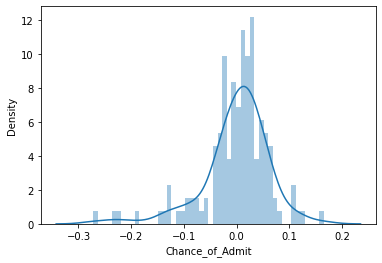

In [ ]:
sn.distplot((y_test-predictions), bins=50)

## Conclusion
We still want to figure out the answer to the original question
Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [ ]:
df = pd.DataFrame( data = logmodel.coef_, columns = ['Coefficient'] ,index = x_train.columns)
df.head()

,Coefficient
GRE_Score,0.029338
TOEFL_Score,0.015168
University_Rating,0.007531
SOP,0.000074
LOR,0.021071


In [ ]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_train[:5]

[1, 0, 0, 0, 0]

In [ ]:
y_test=[1 if value>0.8 else 0 for value in y_test]
y_test[:5]

[1, 0, 0, 1, 1]

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       110
           1       0.82      0.68      0.74        40

    accuracy                           0.87       150
   macro avg       0.85      0.81      0.83       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
print(confusion_matrix(y_test,predictions))

[[104   6]
 [ 13  27]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
predictions = rfc.predict(x_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       110
           1       0.94      0.82      0.88        40

    accuracy                           0.94       150
   macro avg       0.94      0.90      0.92       150
weighted avg       0.94      0.94      0.94       150



**Show the Confusion Matrix for the predictions.**

In [ ]:
print(confusion_matrix(y_test,predictions))

[[108   2]
 [  7  33]]


[Text(0.5769230769230769, 0.875, 'X[5] <= 0.643\ngini = 0.413\nsamples = 350\nvalue = [248, 102]'),
 Text(0.3076923076923077, 0.625, 'X[1] <= 0.874\ngini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.15384615384615385, 0.375, 'X[5] <= 0.13\ngini = 0.042\nsamples = 231\nvalue = [226, 5]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 181\nvalue = [181, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.18\nsamples = 50\nvalue = [45, 5]'),
 Text(0.46153846153846156, 0.375, 'X[0] <= 0.534\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.8461538461538461, 0.625, 'X[5] <= 1.073\ngini = 0.25\nsamples = 109\nvalue = [16, 93]'),
 Text(0.7692307692307693, 0.375, 'X[2] <= 2.5\ngini = 0.426\nsamples = 52\nvalue = [16, 36]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.846153846153

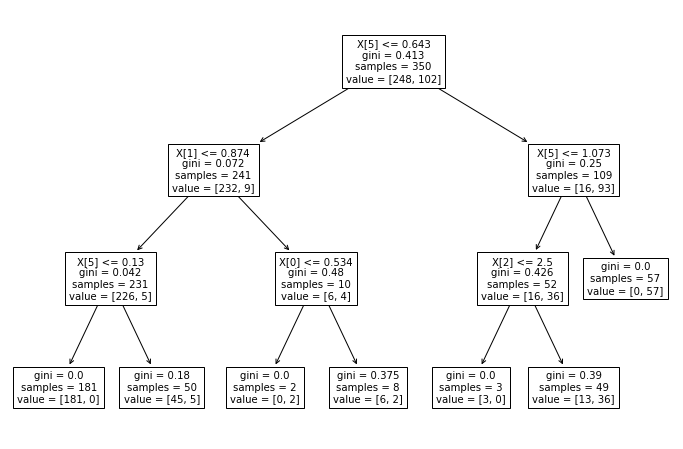

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

[Text(0.5, 0.875, 'X[5] <= 0.569\nentropy = 0.871\nsamples = 350\nvalue = [248, 102]'),
 Text(0.2, 0.625, 'X[5] <= 0.089\nentropy = 0.193\nsamples = 236\nvalue = [229, 7]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 176\nvalue = [176, 0]'),
 Text(0.3, 0.375, 'X[6] <= 0.5\nentropy = 0.52\nsamples = 60\nvalue = [53, 7]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.4, 0.125, 'entropy = 0.679\nsamples = 39\nvalue = [32, 7]'),
 Text(0.8, 0.625, 'X[5] <= 1.073\nentropy = 0.65\nsamples = 114\nvalue = [19, 95]'),
 Text(0.7, 0.375, 'X[4] <= 4.75\nentropy = 0.918\nsamples = 57\nvalue = [19, 38]'),
 Text(0.6, 0.125, 'entropy = 0.968\nsamples = 48\nvalue = [19, 29]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 57\nvalue = [0, 57]')]

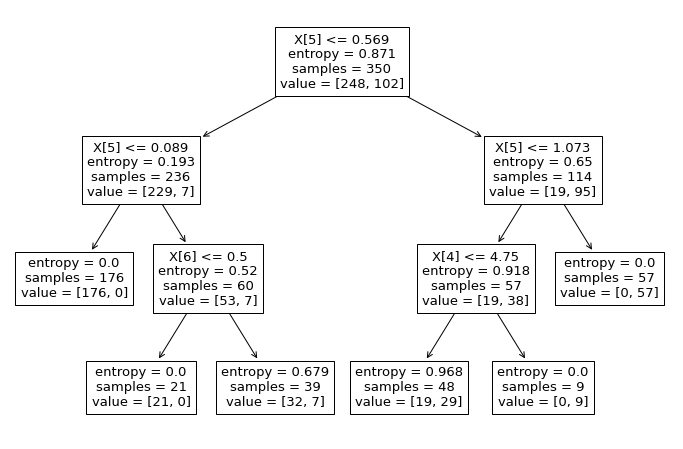

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(x_train, y_train)

evaluate(bagging_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[248   0]
 [  0 102]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    248.0  102.0       1.0      350.0         350.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[107   3]
 [  7  33]]
ACCURACY SCORE:
0.9333
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938596   0.916667  0.933333    0.927632      0.932749
recall       0.972727   0.825000  0.933333    0.898864      0.933333
f1-score     0.955357   0.868421  0.933333    0.911889      0.932174
support    110.000000  40.000000  0.933333  150.000000    150.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(x_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(x_test)),
    },
}

In [ ]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.9333333333333333}}

In [ ]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rfc.predict(x_train)),
        'Test': accuracy_score(y_test, rfc.predict(x_test)),
    }

In [ ]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.9333333333333333},
 'Random Forest': {'Train': 1.0, 'Test': 0.94}}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(x_train, y_train)
evaluate(ada_boost_clf, x_train, x_test, y_train,y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[240   8]
 [ 10  92]]
ACCURACY SCORE:
0.9486
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.960000    0.920000  0.948571    0.940000      0.948343
recall       0.967742    0.901961  0.948571    0.934851      0.948571
f1-score     0.963855    0.910891  0.948571    0.937373      0.948420
support    248.000000  102.000000  0.948571  350.000000    350.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[108   2]
 [  7  33]]
ACCURACY SCORE:
0.9400
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.939130   0.942857      0.94    0.940994      0.940124
recall       0.981818   0.825000      0.94    0.903409      0.940000
f1-score     0.960000   0.880000      0.94    0.920000      0.938667
support    110.000000  40.000000      0.94  150.000000    150.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(x_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(x_test)),
    }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(x_train, y_train)
evaluate(grad_boost_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[248   0]
 [  2 100]]
ACCURACY SCORE:
0.9943
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.992000    1.000000  0.994286    0.996000      0.994331
recall       1.000000    0.980392  0.994286    0.990196      0.994286
f1-score     0.995984    0.990099  0.994286    0.993041      0.994269
support    248.000000  102.000000  0.994286  350.000000    350.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[108   2]
 [  5  35]]
ACCURACY SCORE:
0.9533
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.955752   0.945946  0.953333    0.950849      0.953137
recall       0.981818   0.875000  0.953333    0.928409      0.953333
f1-score     0.968610   0.909091  0.953333    0.938850      0.952738
support    110.000000  40.000000  0.953333  150.000000    150.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(x_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(x_test)),
    }

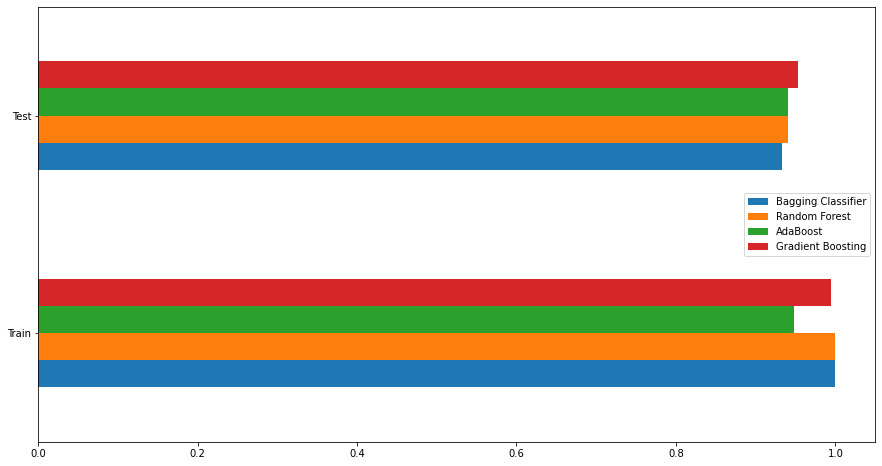

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))